# Introduction to Geopandas

Source: https://automating-gis-processes.github.io/CSC18/lessons/L2/geopandas-basics.html

## Reading a Shapefile

Import geopandas module

In [1]:
import geopandas as gpd

Read shapefile

In [9]:
data = gpd.read_file("DAMSELFISH_distributions.shp")

Print the data type

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

Print the first 5 rows of the data

In [5]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


Plot the data on a map

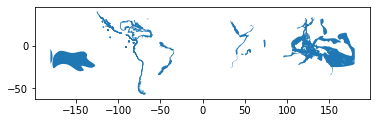

In [7]:
data.plot();

## Writing a shapefile

Select the first 100 rows of the input data and write those into a new Shapefile

In [10]:
data_select = data[0:100]

Write rows into shapefile

In [13]:
data_select.to_file("DAMSELFISH_distributions_SELECTION.shp")

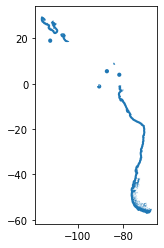

In [23]:
data_select.plot();

Now you can open this file in QGIS (ArcGis) to see how it looks like

## Gemetries in Geopandas

stored in a column called "geometry"; this column is stored as a Shapely object (includes points, lines, polygons etc)

In [14]:
data["geometry"].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

print the areas of the first 10 polygons

In [16]:
data_select = data[0:10]

In [18]:
for index, row in data_select.iterrows():
        poly_area = row['geometry'].area
        print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001
Polygon area at index 5 is: 0.000
Polygon area at index 6 is: 2.732
Polygon area at index 7 is: 2.655
Polygon area at index 8 is: 2.382
Polygon area at index 9 is: 0.536


create a new column to store polygon areas

In [20]:
data["area"] = data.area

In [22]:
data["area"].head(10)

0    1.939625e+01
1    6.145902e+00
2    2.697207e+00
3    8.746062e+01
4    9.183696e-04
5    2.989001e-15
6    2.732157e+00
7    2.654657e+00
8    2.381573e+00
9    5.363015e-01
Name: area, dtype: float64